In [1]:
#importing necessary libraries

import os
import torch
import torchvision
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

In [3]:
len(train_dataset)

60000

In [4]:
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

In [5]:
#defining the path to the idx files and transformations
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)

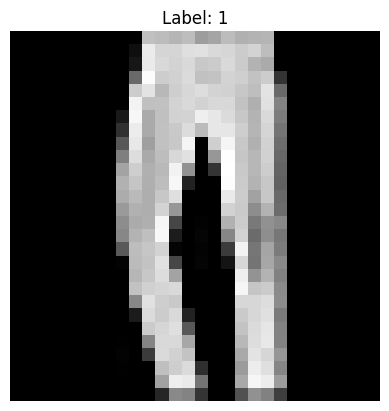

In [6]:
sample_image, sample_label = test_dataset[5]

sample_image_numpy = sample_image.numpy()

sample_image_numpy = (sample_image_numpy * 0.5) + 0.5 #denormalizing the image

# Display the image
plt.imshow(sample_image_numpy.squeeze(), cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

In [2]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)  
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  
        x = self.fc_layers(x)
        return x

cnn_model = CNNModel()

Epoch [1/10], Loss: 0.5921, Accuracy: 78.55%
Epoch [2/10], Loss: 0.3830, Accuracy: 86.25%
Epoch [3/10], Loss: 0.3237, Accuracy: 88.47%
Epoch [4/10], Loss: 0.2905, Accuracy: 89.62%
Epoch [5/10], Loss: 0.2615, Accuracy: 90.64%
Epoch [6/10], Loss: 0.2426, Accuracy: 91.22%
Epoch [7/10], Loss: 0.2224, Accuracy: 91.90%
Epoch [8/10], Loss: 0.2098, Accuracy: 92.29%
Epoch [9/10], Loss: 0.1955, Accuracy: 92.65%
Epoch [10/10], Loss: 0.1819, Accuracy: 93.34%


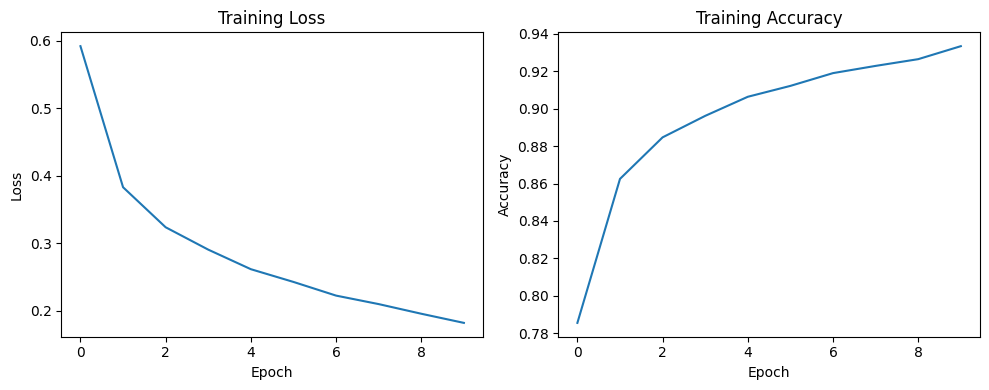

In [30]:
import torch.optim as optim

device = ("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

train_losses = []
train_accuracies = []

#  Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]*100:.2f}%')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()



Epoch [1/10], Loss: 0.0565, Accuracy: 90.28%
Epoch [2/10], Loss: 0.0492, Accuracy: 91.00%
Epoch [3/10], Loss: 0.0449, Accuracy: 92.10%
Epoch [4/10], Loss: 0.0390, Accuracy: 92.83%
Epoch [5/10], Loss: 0.0359, Accuracy: 93.30%
Epoch [6/10], Loss: 0.0338, Accuracy: 94.00%
Epoch [7/10], Loss: 0.0308, Accuracy: 94.32%
Epoch [8/10], Loss: 0.0275, Accuracy: 94.82%
Epoch [9/10], Loss: 0.0264, Accuracy: 95.11%
Epoch [10/10], Loss: 0.0238, Accuracy: 95.52%


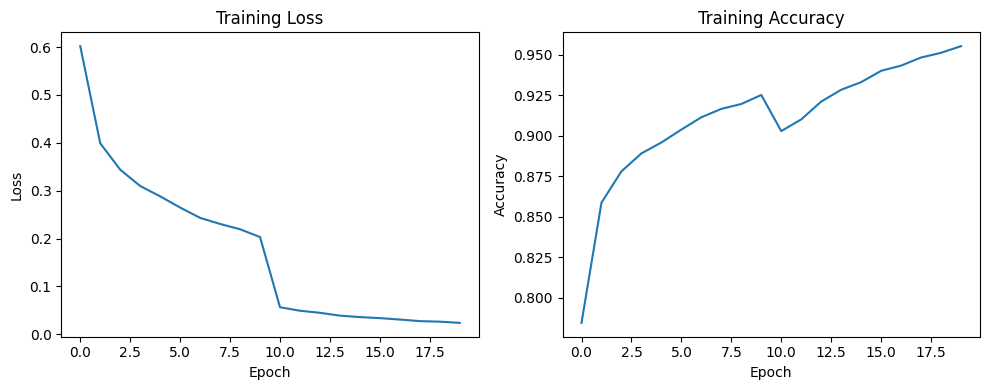

In [20]:
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]*100:.2f}%')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

Epoch [1/10], Loss: 0.0627, Accuracy: 89.19%
Epoch [2/10], Loss: 0.0502, Accuracy: 91.13%
Epoch [3/10], Loss: 0.0438, Accuracy: 92.00%
Epoch [4/10], Loss: 0.0399, Accuracy: 92.68%
Epoch [5/10], Loss: 0.0352, Accuracy: 93.59%
Epoch [6/10], Loss: 0.0328, Accuracy: 94.02%
Epoch [7/10], Loss: 0.0294, Accuracy: 94.21%
Epoch [8/10], Loss: 0.0266, Accuracy: 94.97%
Epoch [9/10], Loss: 0.0242, Accuracy: 95.34%
Epoch [10/10], Loss: 0.0233, Accuracy: 95.63%


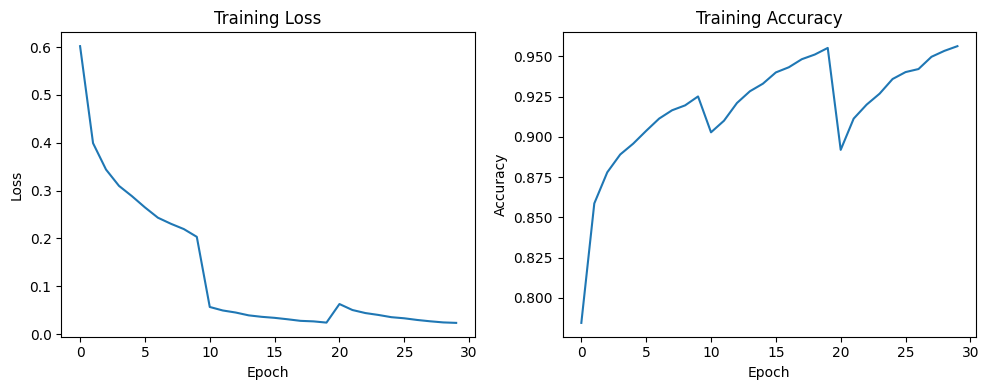

In [21]:
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]*100:.2f}%')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

In [22]:
from torchvision import datasets

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel()
model.load_state_dict(torch.load('fashionModel.pth'))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test dataset: {accuracy:.2f}%")

Accuracy on the test dataset: 91.49%


In [31]:
torch.save(cnn_model.state_dict(), 'fashionModel.pth')